In [23]:
import matplotlib.pyplot as plt
import seaborn as srn
import pandas as pd
import numpy as np

train=pd.read_csv('G:\\Python coding\\Metropolia\\ML Projects\\Dataset\\train.csv')

test=pd.read_csv('G:\\Python coding\\Metropolia\\ML Projects\\Dataset\\test.csv')


train.head(5)

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,9,1,5,4,3,6,3,1,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,1,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,1,0,0,0,0


C:\Users\gkipp\AppData\Local\Temp\ipykernel_33140\586827214.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(train['revenue'],kde=False)
C:\Users\gkipp\AppData\Local\Temp\ipykernel_33140\586827214.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(np.log1p(train['revenue']),kde=False)


Text(0.5, 1.0, 'Distribution of log revenue')

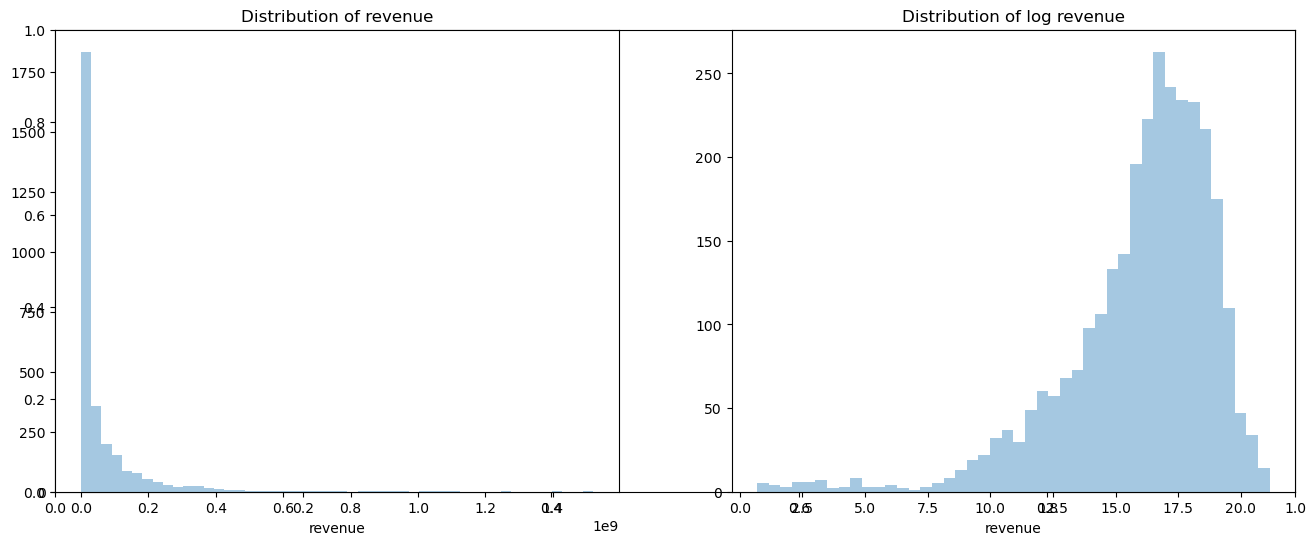

In [7]:
#Visualizing the Target Distribution i.e Revenue

fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
srn.distplot(train['revenue'],kde=False)
plt.title('Distribution of revenue')
plt.subplot(1,2,2)
srn.distplot(np.log1p(train['revenue']),kde=False)
plt.title('Distribution of log revenue')

In [77]:
train['Log Revenue'] = np.log1p(train['revenue'])

Text(0.5, 1.0, 'log Budget Vs log Revenue')

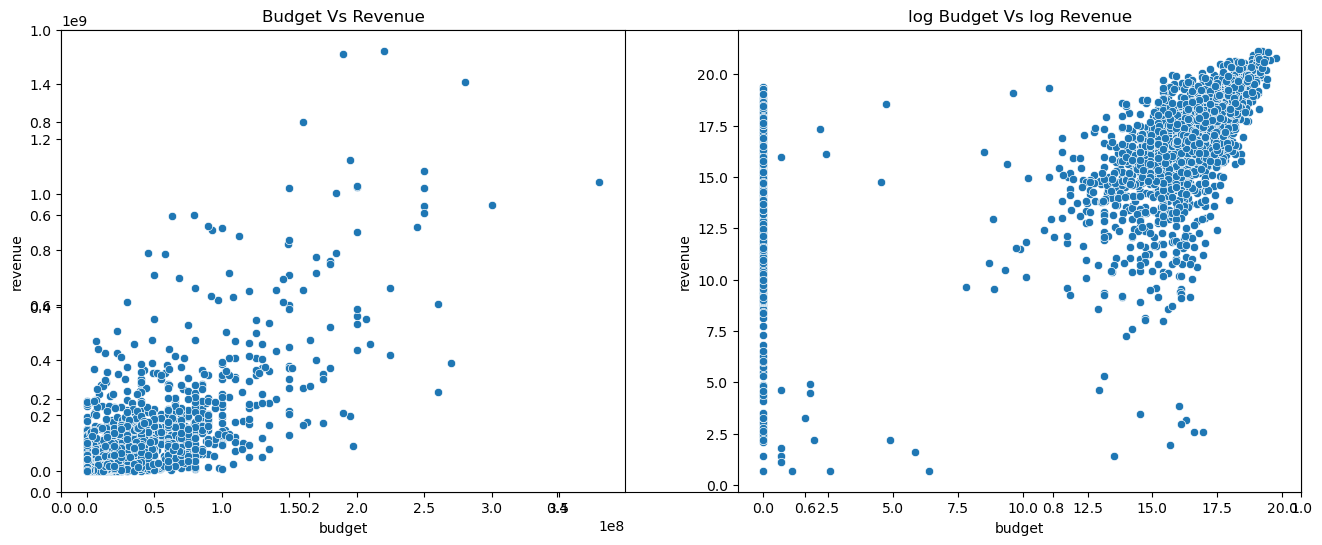

In [9]:
#Task 3: Relationship between Film Revenue and Budget
fig, ax= plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
srn.scatterplot(x=train['budget'],y=train['revenue'])
plt.title('Budget Vs Revenue')
plt.subplot(1,2,2)
srn.scatterplot(x=np.log1p(train['budget']),y=np.log1p(train['revenue']))
plt.title('log Budget Vs log Revenue')

In [103]:
# Does having an Official Homepage Affect Revenue?
train['has_homepage']= 0
train.loc[train['homepage'].isnull()==False, 'has_homepage']=1
test['has_homepage']=0
test.loc[test['homepage'].isnull()==False, 'has_homepage']=1

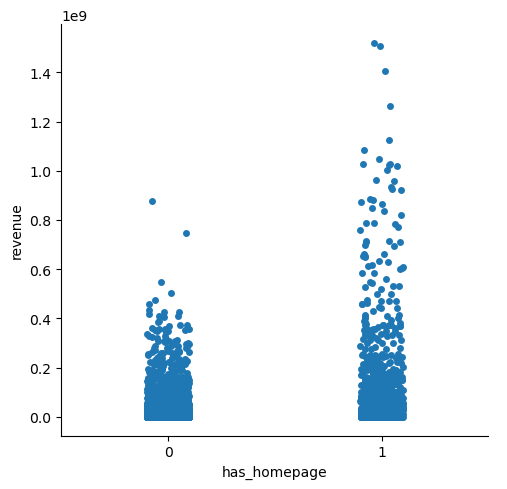

In [107]:
srn.catplot(x='has_homepage',y='revenue',data=train)

Text(0.5, 1.0, 'original language vs log revenue')

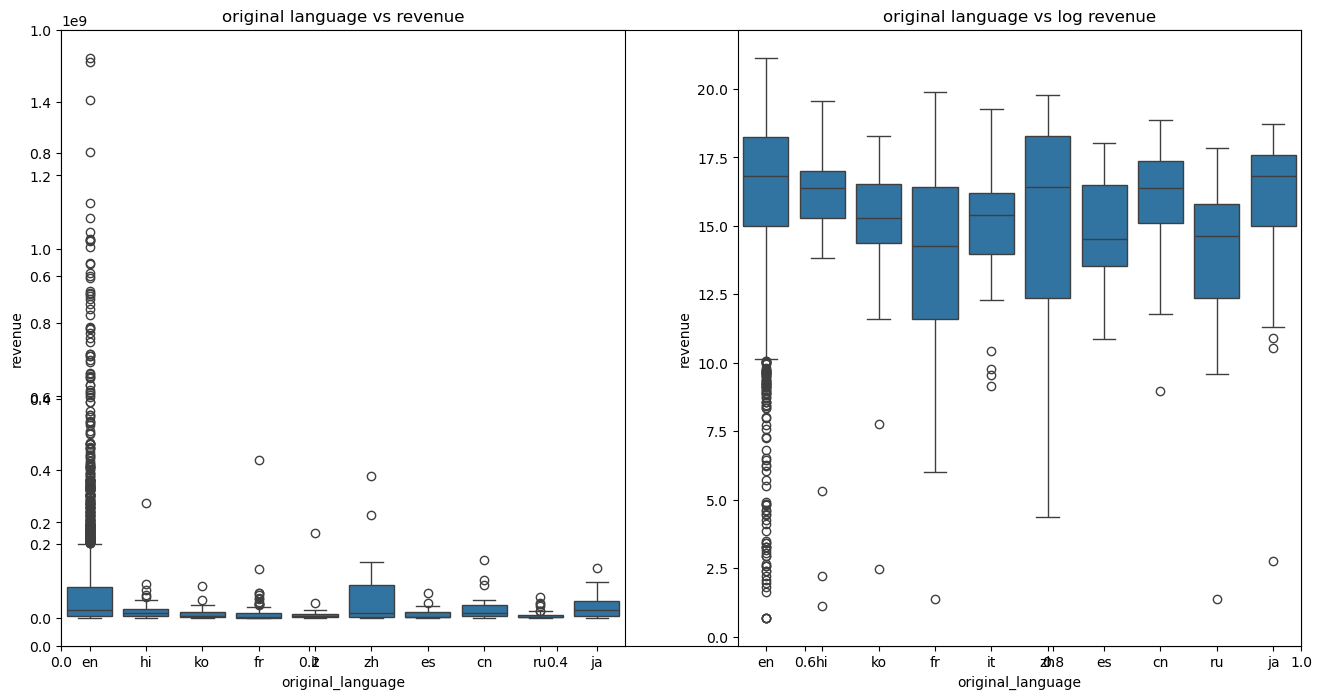

In [19]:
# Task 5: Distribution of Languages in Film

lang_data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]
fig, ax=plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
srn.boxplot(x='original_language',y='revenue',data=lang_data)
plt.title('original language vs revenue')

plt.subplot(1,2,2)
srn.boxplot(x='original_language',y=np.log1p(train['revenue']),data=lang_data)
plt.title('original language vs log revenue')

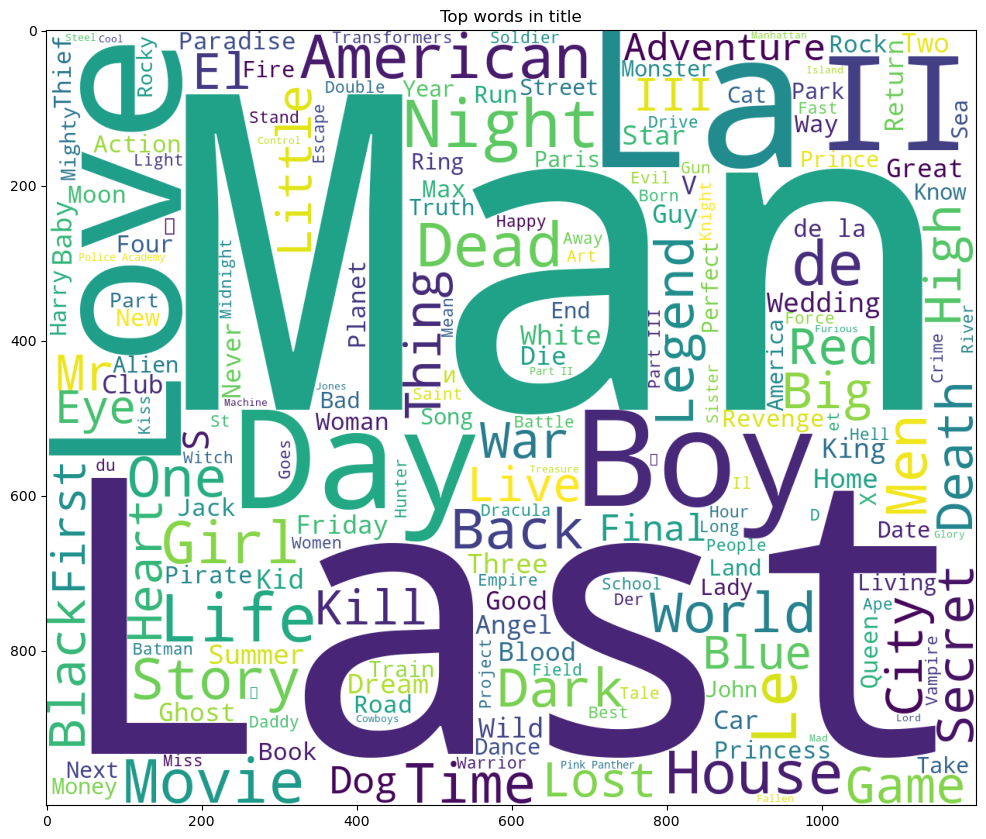

In [50]:
#Task 6: Frequent Words in Film Titles and Descriptions

from wordcloud import WordCloud
'''title=' '.join(train['original_title'])
plt.imshow(WordCloud().generate(title))
plt.figure(figsize=(10,10))'''

plt.figure(figsize=(12,12))
title=' '.join(train['original_title'].values)
wordcloud= WordCloud(max_font_size=None, background_color='white',width=1200,height=1000).generate(title)
plt.imshow(wordcloud)
plt.title('Top words in title')
#plt.axis('off')
plt.show()

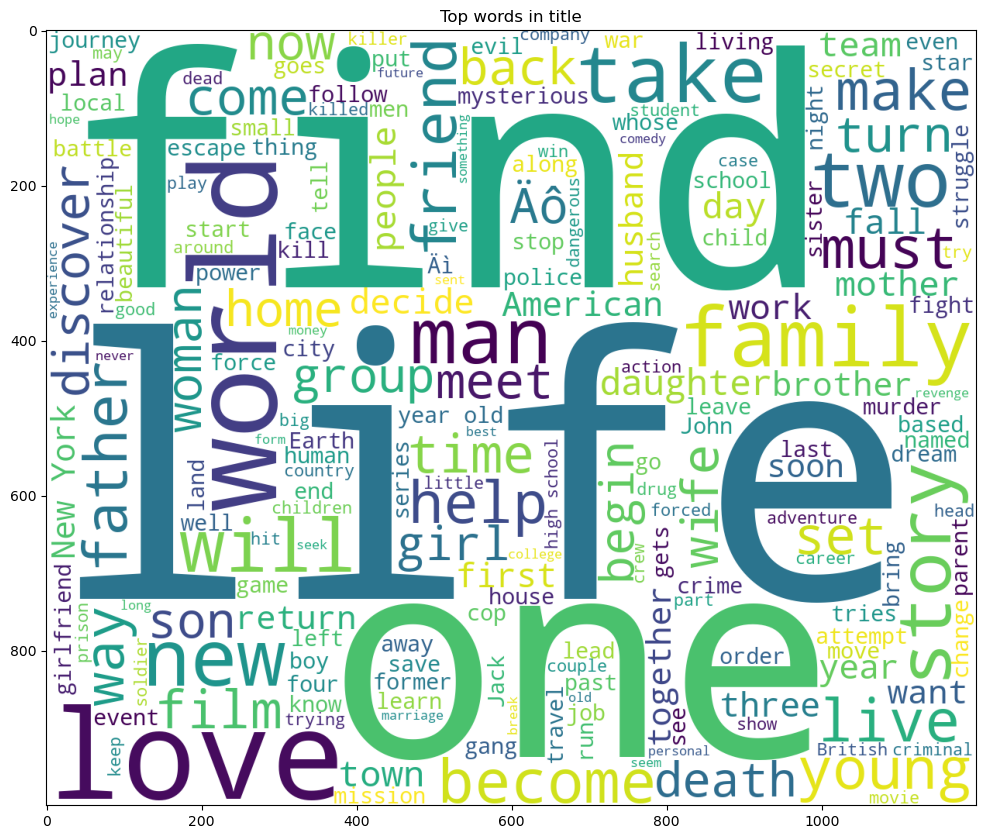

In [51]:
plt.figure(figsize=(12,12))
title=' '.join(train['overview'].fillna('').values)
wordcloud= WordCloud(max_font_size=None, background_color='white',width=1200,height=1000).generate(title)
plt.imshow(wordcloud)
plt.title('Top words in title')
#plt.axis('off')
plt.show()

In [66]:
import eli5
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

# Define the TfidfVectorizer
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    min_df=5
)

# Transform the 'overview' text
overview_text = vectorizer.fit_transform(train['overview'].fillna(''))

# Fit a Linear Regression model
linreg = LinearRegression()
linreg.fit(overview_text, np.log1p(train['revenue']))

# Display feature importance using eli5
eli5.show_weights(
    linreg,
    vec=vectorizer,
    top=20,  # Correct parameter for number of features to show
    feature_filter=lambda x: x != '<BIAS>'
)

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\gkipp\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)